In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
df = pd.read_csv("Books.csv")

for col in ["pages", "average_rating"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252.0,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,NaN,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,NaN,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662.0,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,NaN,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512.0,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,NaN,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248.0,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,NaN,0,http://books.google.com/books/content?id=KXzoz...


In [10]:
numerical_features = ["pages", "average_rating"]
categorical_features = ["author", "genre", "language"]
text_features = ["description"]

X = df[numerical_features + categorical_features + text_features]
y = df["ratings_count"]

# Préparation des transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("text", TfidfVectorizer(max_features=100), "description")
    ]
)

# Création du pipeline final
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("regressor", RandomForestRegressor(random_state=42))])


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2:.2f}")

R2 Score : 0.09


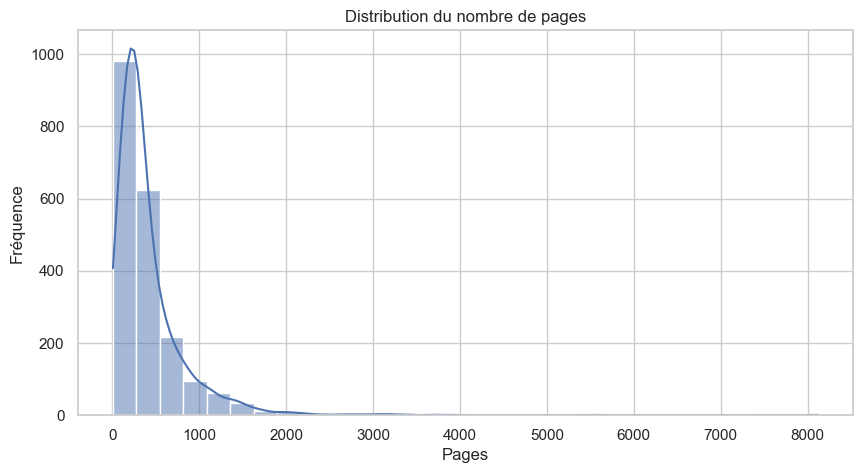

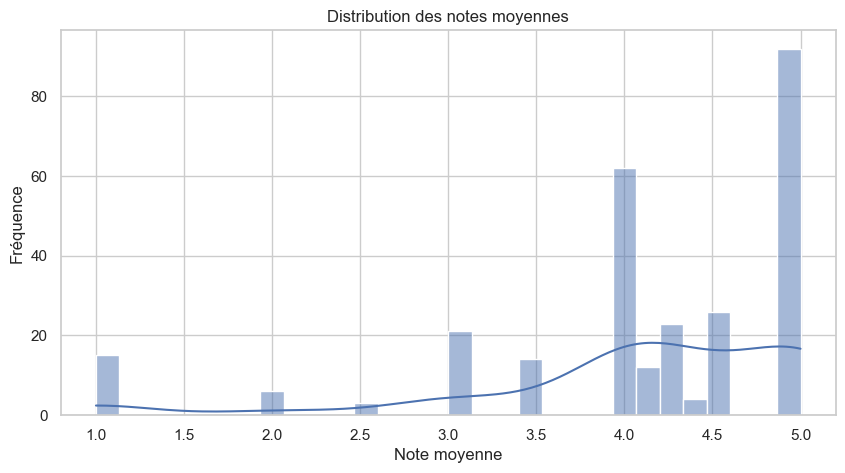

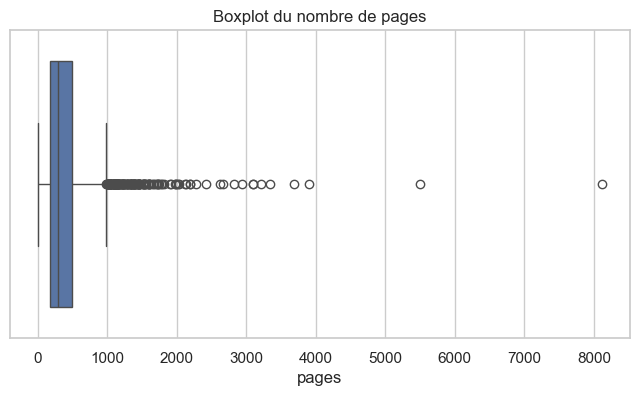

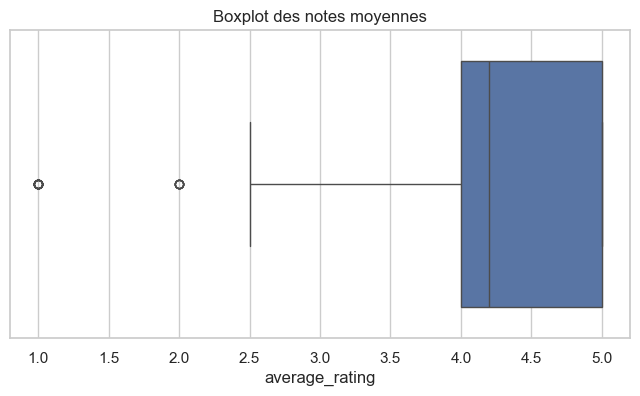

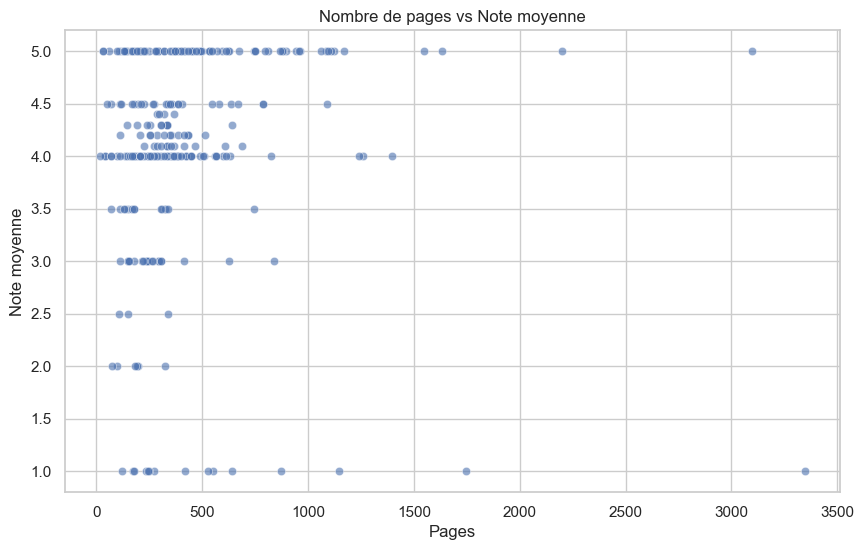

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des styles
sns.set(style="whitegrid")

# Histogramme des pages
plt.figure(figsize=(10, 5))
sns.histplot(df["pages"], bins=30, kde=True)
plt.title("Distribution du nombre de pages")
plt.xlabel("Pages")
plt.ylabel("Fréquence")
plt.show()

# Histogramme des notes moyennes
plt.figure(figsize=(10, 5))
sns.histplot(df["average_rating"], bins=30, kde=True)
plt.title("Distribution des notes moyennes")
plt.xlabel("Note moyenne")
plt.ylabel("Fréquence")
plt.show()